<a href="https://colab.research.google.com/github/Snezaa/Snezaa.informatika/blob/main/%D0%90%D0%BB%D0%B3%D0%BE%D1%80%D0%B8%D1%82%D0%BC_%D0%9F%D1%80%D0%B8%D0%BC%D0%B0_%D0%B8_%D0%9A%D1%80%D0%B0%D1%81%D0%BA%D0%B0%D0%BB%D0%B0_%D0%93%D0%B5%D1%82%D0%BC%D0%B0%D0%BD%D0%BE%D0%B2%D0%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Пример кода на Python 3 для реализации Алгоритма Прима и Алгоритма Краскала с данными сайта Yahoo Finance (с визуализацией выходных данных):**

# **Алгоритм Прима**

Алгоритм построения остовного дерева минимальной стоимости. Впервые предложен чешским математиком Войцехом Ярником в 1930 году. Позже, в 1957 году, независимо от Ярника разработан Робертом Примом, именно, за ним и закрепилось название этого алгоритма построения минимального остовного дерева.

In [ ]:
%%html
<iframe width="560" height="315" src="https://www.youtube.com/embed/_SLQMpLzcUE?si=p_Rl1j10E3X46LyQ" title="YouTube video player" frameborder="0" allow="accelerometer; autoplay; clipboard-write; encrypted-media; gyroscope; picture-in-picture; web-share" allowfullscreen></iframe>

In [ ]:
#-------------------------------------------------
# Алгоритм Прима поиска минимального остова графа
#-------------------------------------------------
import math


def get_min(R, U):
    rm = (math.inf, -1, -1)
    for v in U:
        rr = min(R, key=lambda x: x[0] if (x[1] == v or x[2] == v) and (x[1] not in U or x[2] not in U) else math.inf)
        if rm[0] > rr[0]:
            rm = rr

    return rm


# список ребер графа (длина, вершина 1, вершина 2)
# первое значение возвращается, если нет минимальных ребер
R = [(math.inf, -1, -1), (13, 1, 2), (18, 1, 3), (17, 1, 4), (14, 1, 5), (22, 1, 6),
     (26, 2, 3), (19, 2, 5), (30, 3, 4), (22, 4, 6)]

N = 6     # число вершин в графе
U = {1}   # множество соединенных вершин
T = []    # список ребер остова

while len(U) < N:
    r = get_min(R, U)       # ребро с минимальным весом
    if r[0] == math.inf:    # если ребер нет, то остов построен
        break

    T.append(r)             # добавляем ребро в остов
    U.add(r[1])             # добавляем вершины в множество U
    U.add(r[2])

print(T)

[(13, 1, 2), (14, 1, 5), (17, 1, 4), (18, 1, 3), (22, 1, 6)]


# **Алгоритм Краскала**

Алгоритм Краскала позволяет построить минимальное остовное дерево взвешенного связного графа. Алгоритм впервые описан Джозефом Краскалом в 1956 году.

In [ ]:
%%html
<iframe width="560" height="315" src="https://www.youtube.com/embed/KDKACf8tcnM?si=VQWvrzyBX7K4diV3" title="YouTube video player" frameborder="0" allow="accelerometer; autoplay; clipboard-write; encrypted-media; gyroscope; picture-in-picture; web-share" allowfullscreen></iframe>

In [ ]:
#-------------------------------------------------
# Алгоритм Краскала поиска минимального остова графа
#-------------------------------------------------

# список ребер графа (длина, вершина 1, вершина 2)
R = [(13, 1, 2), (18, 1, 3), (17, 1, 4), (14, 1, 5), (22, 1, 6),
     (26, 2, 3), (22, 2, 5), (3, 3, 4), (19, 4, 6)]

Rs = sorted(R, key=lambda x: x[0])
U = set()   # список соединенных вершин
D = {}      # словарь списка изолированных групп вершин
T = []      # список ребер остова

for r in Rs:
    if r[1] not in U or r[2] not in U:  # проверка для исключения циклов в остове
        if r[1] not in U and r[2] not in U: # если обе вершины не соединены, то
            D[r[1]] = [r[1], r[2]]          # формируем в словаре ключ с номерами вершин
            D[r[2]] = D[r[1]]               # и связываем их с одним и тем же списком вершин
        else:                           # иначе
            if not D.get(r[1]):             # если в словаре нет первой вершины, то
                D[r[2]].append(r[1])        # добавляем в список первую вершину
                D[r[1]] = D[r[2]]           # и добавляем ключ с номером первой вершины
            else:
                D[r[1]].append(r[2])        # иначе, все то же самое делаем со второй вершиной
                D[r[2]] = D[r[1]]

        T.append(r)             # добавляем ребро в остов
        U.add(r[1])             # добавляем вершины в множество U
        U.add(r[2])

for r in Rs:    # проходим по ребрам второй раз и объединяем разрозненные группы вершин
    if r[2] not in D[r[1]]:     # если вершины принадлежат разным группам, то объединяем
        T.append(r)             # добавляем ребро в остов
        gr1 = D[r[1]]
        D[r[1]] += D[r[2]]      # объединем списки двух групп вершин
        D[r[2]] += gr1

print(T)

[(3, 3, 4), (13, 1, 2), (14, 1, 5), (19, 4, 6), (17, 1, 4)]


In [ ]:
pip install yfinance networkx matplotlib

[*********************100%%**********************]  4 of 4 completed


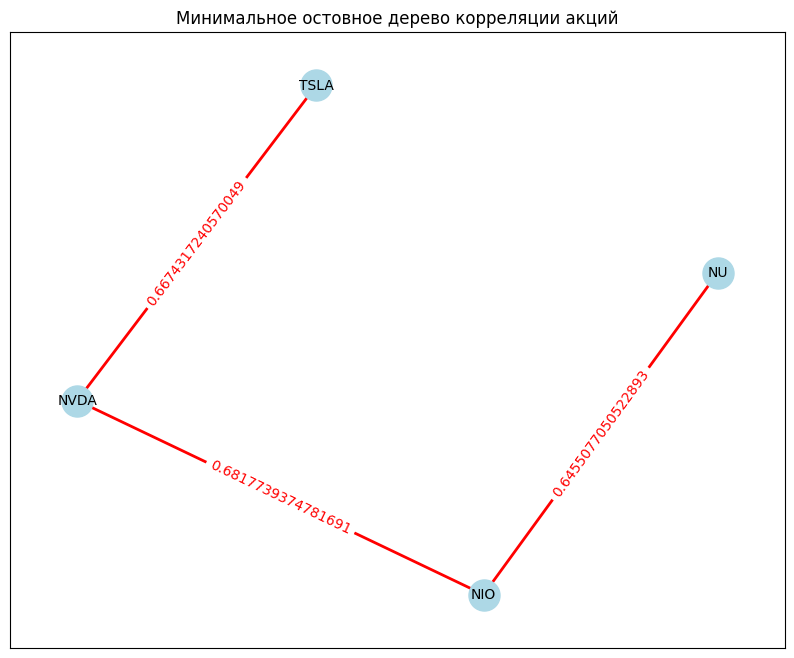

In [ ]:
import yfinance as yf
import networkx as nx
import matplotlib.pyplot as plt

# Загрузка данных о корреляции между акциями
stocks = ['NVDA', 'TSLA', 'NU', 'NIO']
stock_data = yf.download(stocks, start='2022-01-01', end='2022-12-31')

# Вычисление матрицы корреляции
correlation_matrix = stock_data['Adj Close'].corr()

# Создание графа из матрицы корреляции
G = nx.Graph()
for i in range(len(stocks)):
    for j in range(i + 1, len(stocks)):
        stock1, stock2 = stocks[i], stocks[j]
        correlation = correlation_matrix.at[stock1, stock2]
        G.add_edge(stock1, stock2, weight=correlation)

# Реализация алгоритма Крускала
minimum_spanning_tree = nx.minimum_spanning_tree(G)

# Визуализация минимального остовного дерева
pos = nx.spring_layout(G)  # Задаем расположение вершин
labels = {stock: stock for stock in stocks}
edge_labels = {(stock1, stock2): weight for stock1, stock2, weight in minimum_spanning_tree.edges(data='weight')}

plt.figure(figsize=(10, 8))
nx.draw_networkx_nodes(G, pos, node_size=500, node_color='lightblue')
nx.draw_networkx_labels(G, pos, labels=labels, font_size=10)
nx.draw_networkx_edges(G, pos, edgelist=minimum_spanning_tree.edges(), edge_color='r', width=2)
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=10, font_color='red')

plt.title("Минимальное остовное дерево корреляции акций")
plt.show()

Визуализация графа корреляции акций

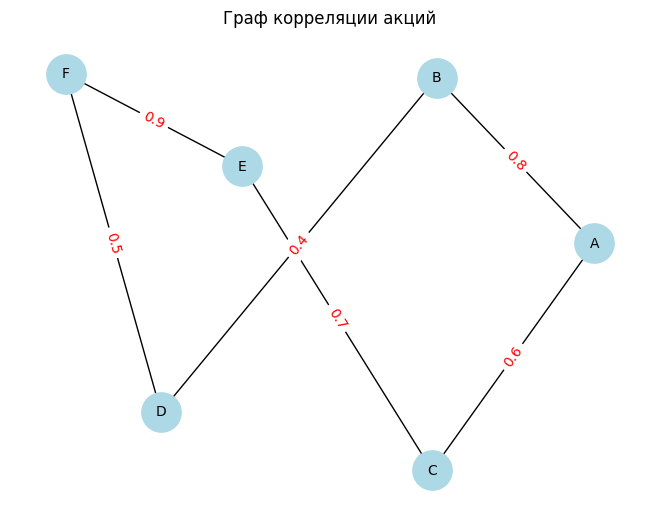

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

# Граф корреляции между акциями (положительная корреляция)
graph = {
    'A': [('B', 0.8), ('C', 0.6)],
    'B': [('A', 0.8), ('D', 0.4)],
    'C': [('A', 0.6), ('E', 0.7)],
    'D': [('B', 0.4), ('F', 0.5)],
    'E': [('C', 0.7), ('F', 0.9)],
    'F': [('D', 0.5), ('E', 0.9)]
}

# Создаем пустой граф
G = nx.Graph()

# Добавляем вершины и рёбра в граф
for node, edges in graph.items():
    G.add_node(node)
    for edge, weight in edges:
        G.add_edge(node, edge, weight=weight)

# Визуализируем граф
pos = nx.spring_layout(G, seed=42)  # Задаем расположение вершин
labels = {node: node for node in G.nodes()}
edge_labels = {(node1, node2): weight for node1, node2, weight in G.edges(data='weight')}

nx.draw(G, pos, with_labels=True, node_size=800, node_color='lightblue', font_size=10, labels=labels)
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=10, font_color='red')

plt.title("Граф корреляции акций")
plt.show()

Визуализация графа транзакций

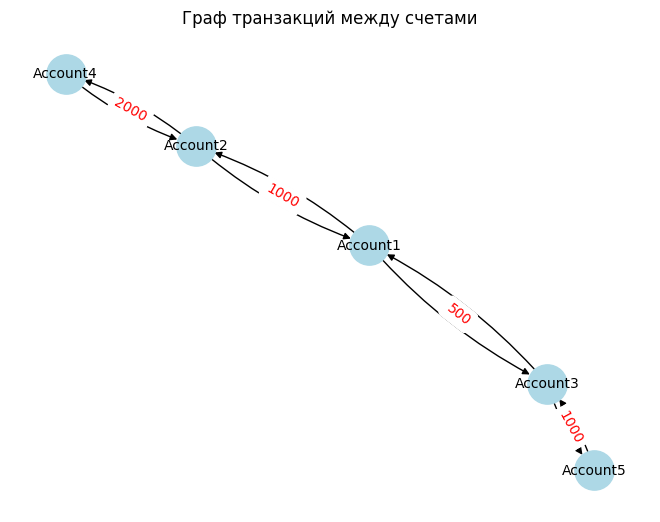

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

# Граф транзакций между счетами
graph = {
    'Account1': [('Account2', 1000), ('Account3', 500)],
    'Account2': [('Account1', 1000), ('Account4', 2000)],
    'Account3': [('Account1', 500), ('Account5', 1000)],
    'Account4': [('Account2', 2000)],
    'Account5': [('Account3', 1000)]
}

# Создаем пустой граф
G = nx.DiGraph()  # Используем ориентированный граф, так как это транзакции

# Добавляем вершины и рёбра в граф
for node, edges in graph.items():
    G.add_node(node)
    for edge, weight in edges:
        G.add_edge(node, edge, weight=weight)

# Визуализируем граф
pos = nx.spring_layout(G, seed=42)  # Задаем расположение вершин
labels = {node: node for node in G.nodes()}
edge_labels = {(node1, node2): weight for node1, node2, weight in G.edges(data='weight')}

nx.draw(G, pos, with_labels=True, node_size=800, node_color='lightblue', font_size=10, labels=labels, connectionstyle="arc3,rad=0.1")
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=10, font_color='red')

plt.title("Граф транзакций между счетами")
plt.show()

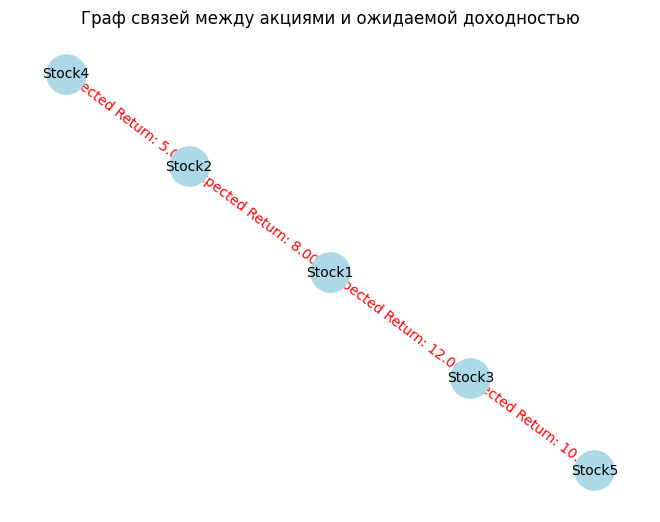

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

# Граф связей между акциями и их ожидаемая доходность
graph = {
    'Stock1': [('Stock2', 0.08), ('Stock3', 0.12)],
    'Stock2': [('Stock1', 0.08), ('Stock4', 0.05)],
    'Stock3': [('Stock1', 0.12), ('Stock5', 0.1)],
    'Stock4': [('Stock2', 0.05)],
    'Stock5': [('Stock3', 0.1)]
}

# Создаем пустой граф
G = nx.Graph()

# Добавляем вершины и рёбра в граф
for node, edges in graph.items():
    G.add_node(node)
    for edge, expected_return in edges:
        G.add_edge(node, edge, expected_return=expected_return)

# Визуализируем граф с оценками риска и доходности
pos = nx.spring_layout(G, seed=42)  # Задаем расположение вершин
labels = {node: node for node in G.nodes()}
edge_labels = {(node1, node2): f'Expected Return: {expected_return * 100:.2f}%' for node1, node2, expected_return in G.edges(data='expected_return')}

nx.draw(G, pos, with_labels=True, node_size=800, node_color='lightblue', font_size=10, labels=labels)
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=10, font_color='red')

plt.title("Граф связей между акциями и ожидаемой доходностью")
plt.show()

Визуализация аномалий в графе транзакций

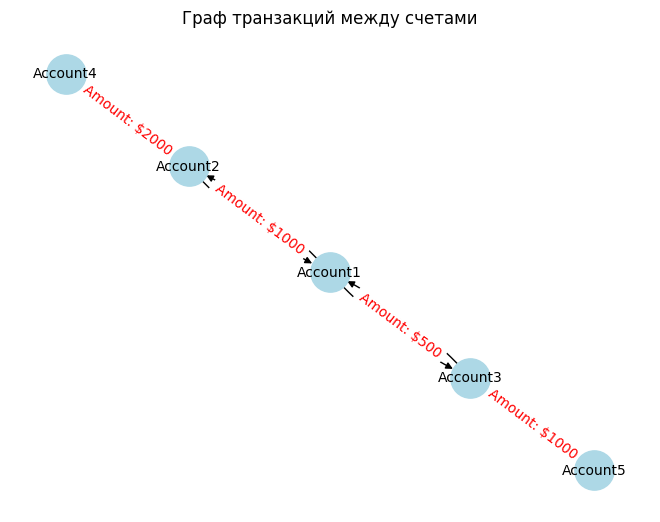

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

# Граф транзакций между счетами
graph = {
    'Account1': [('Account2', 1000), ('Account3', 500)],
    'Account2': [('Account1', 1000), ('Account4', 2000)],
    'Account3': [('Account1', 500), ('Account5', 1000)],
    'Account4': [('Account2', 2000)],
    'Account5': [('Account3', 1000)]
}

# Создаем пустой граф
G = nx.DiGraph()  # Используем ориентированный граф, так как это транзакции

# Добавляем вершины и рёбра в граф
for node, edges in graph.items():
    G.add_node(node)
    for edge, amount in edges:
        G.add_edge(node, edge, amount=amount)

# Визуализируем граф
pos = nx.spring_layout(G, seed=42)  # Задаем расположение вершин
labels = {node: node for node in G.nodes()}
edge_labels = {(node1, node2): f'Amount: ${amount}' for node1, node2, amount in G.edges(data='amount')}

nx.draw(G, pos, with_labels=True, node_size=800, node_color='lightblue', font_size=10, labels=labels, connectionstyle="arc3,rad=0.1")
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=10, font_color='red')

plt.title("Граф транзакций между счетами")
plt.show()

In [ ]:
pip install yfinance networkx matplotlib

[*********************100%%**********************]  1 of 1 completed


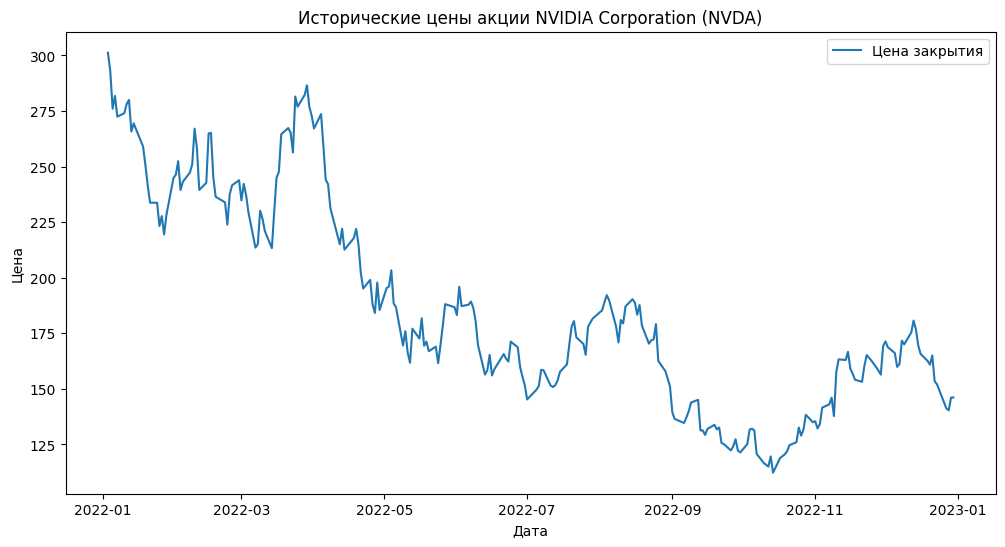

In [ ]:
import yfinance as yf
import matplotlib.pyplot as plt

# Загрузка данных о ценах акций
stock_data = yf.download('NVDA', start='2022-01-01', end='2022-12-31')

# Визуализация исторических цен акции
plt.figure(figsize=(12, 6))
plt.plot(stock_data['Close'], label='Цена закрытия')
plt.title('Исторические цены акции NVIDIA Corporation (NVDA)')
plt.xlabel('Дата')
plt.ylabel('Цена')
plt.legend()
plt.show()

Визуализация корреляции между акциями

[*********************100%%**********************]  4 of 4 completed


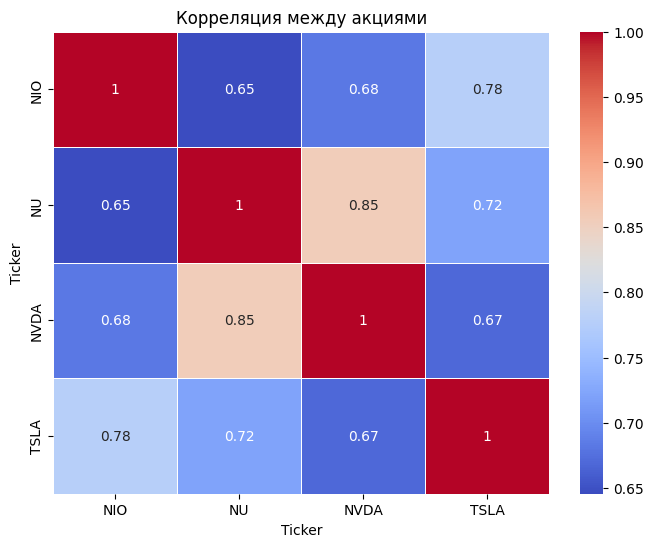

In [ ]:
import yfinance as yf
import pandas as pd
import seaborn as sns

# Загрузка данных о ценах акций
stocks = ['NVDA', 'TSLA', 'NU', 'NIO']
stock_data = yf.download(stocks, start='2022-01-01', end='2022-12-31')

# Вычисление корреляции
correlation_matrix = stock_data['Close'].corr()

# Визуализация корреляции с использованием Seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Корреляция между акциями')
plt.show()

 Визуализация объема торгов

[*********************100%%**********************]  1 of 1 completed


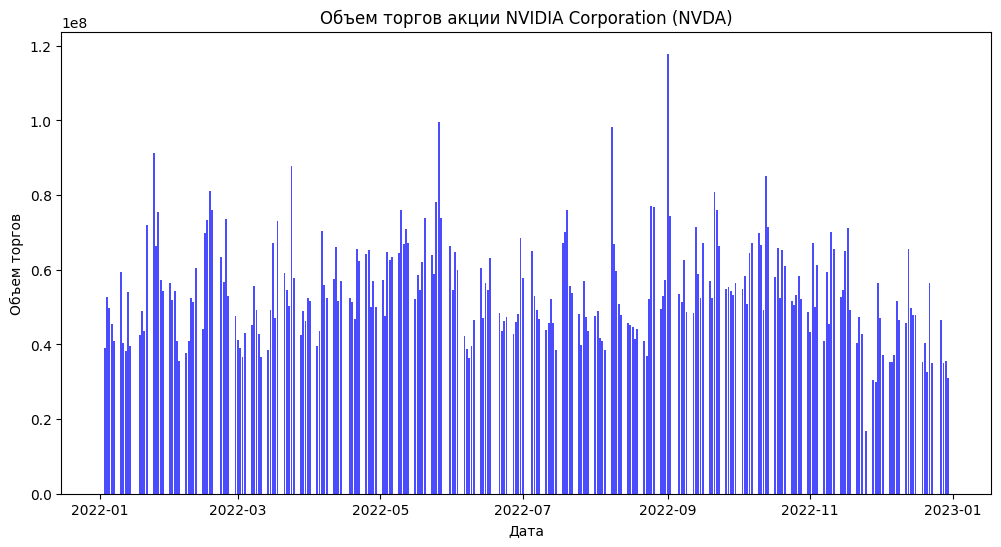

In [ ]:
import yfinance as yf
import matplotlib.pyplot as plt

# Загрузка данных о ценах акций и объеме торгов
stock_data = yf.download('NVDA', start='2022-01-01', end='2022-12-31')

# Визуализация объема торгов
plt.figure(figsize=(12, 6))
plt.bar(stock_data.index, stock_data['Volume'], color='b', alpha=0.7)
plt.title('Объем торгов акции NVIDIA Corporation (NVDA)')
plt.xlabel('Дата')
plt.ylabel('Объем торгов')
plt.show()

Визуализация скользящей средней

[*********************100%%**********************]  1 of 1 completed


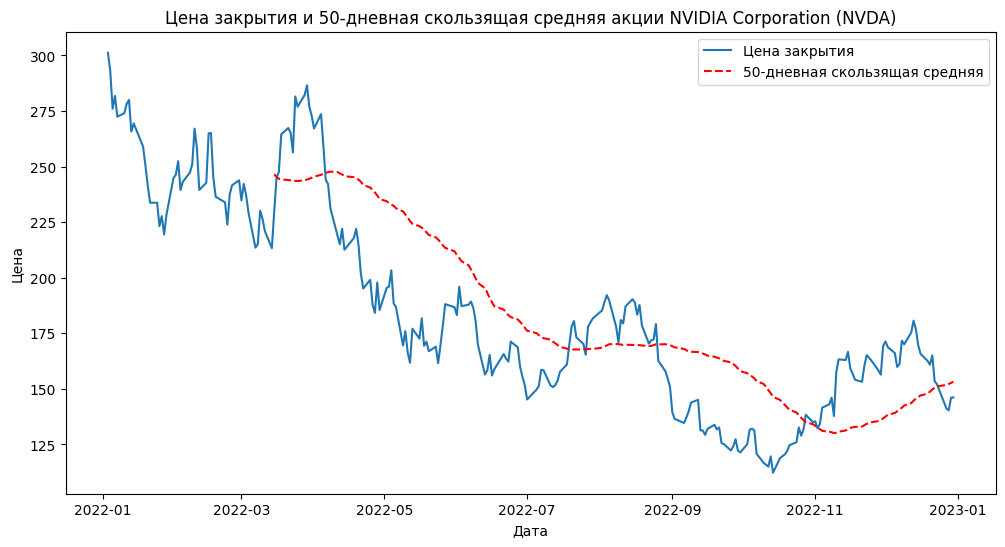

In [ ]:
import yfinance as yf
import matplotlib.pyplot as plt

# Загрузка данных о ценах акции
stock_data = yf.download('NVDA', start='2022-01-01', end='2022-12-31')

# Вычисление 50-дневной скользящей средней
stock_data['SMA_50'] = stock_data['Close'].rolling(window=50).mean()

# Визуализация цены закрытия и скользящей средней
plt.figure(figsize=(12, 6))
plt.plot(stock_data['Close'], label='Цена закрытия')
plt.plot(stock_data['SMA_50'], label='50-дневная скользящая средняя', linestyle='--', color='red')
plt.title('Цена закрытия и 50-дневная скользящая средняя акции NVIDIA Corporation (NVDA)')
plt.xlabel('Дата')
plt.ylabel('Цена')
plt.legend()
plt.show()

Визуализация структуры портфеля

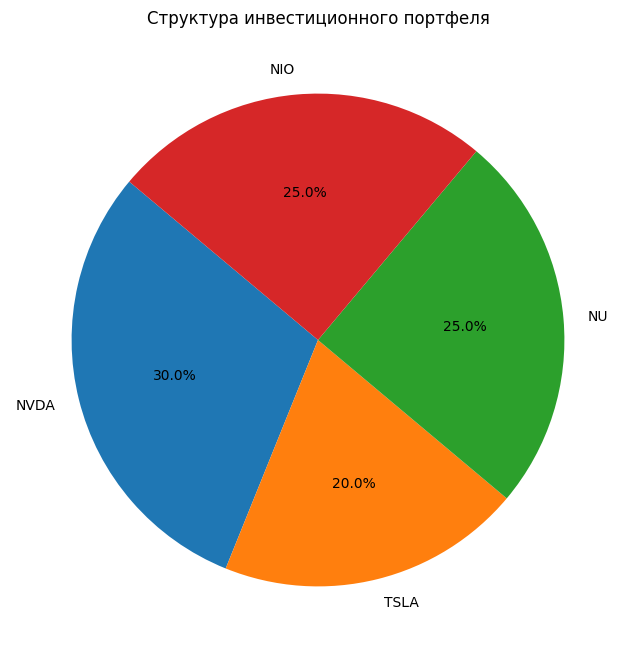

In [ ]:
import matplotlib.pyplot as plt

# Список акций в портфеле
portfolio = ['NVDA', 'TSLA', 'NU', 'NIO']
weights = [0.3, 0.2, 0.25, 0.25]  # Веса акций в портфеле

# Визуализация структуры портфеля
plt.figure(figsize=(8, 8))
plt.pie(weights, labels=portfolio, autopct='%1.1f%%', startangle=140)
plt.title('Структура инвестиционного портфеля')
plt.show()

Визуализация динамики доходности портфеля

[*********************100%%**********************]  4 of 4 completed


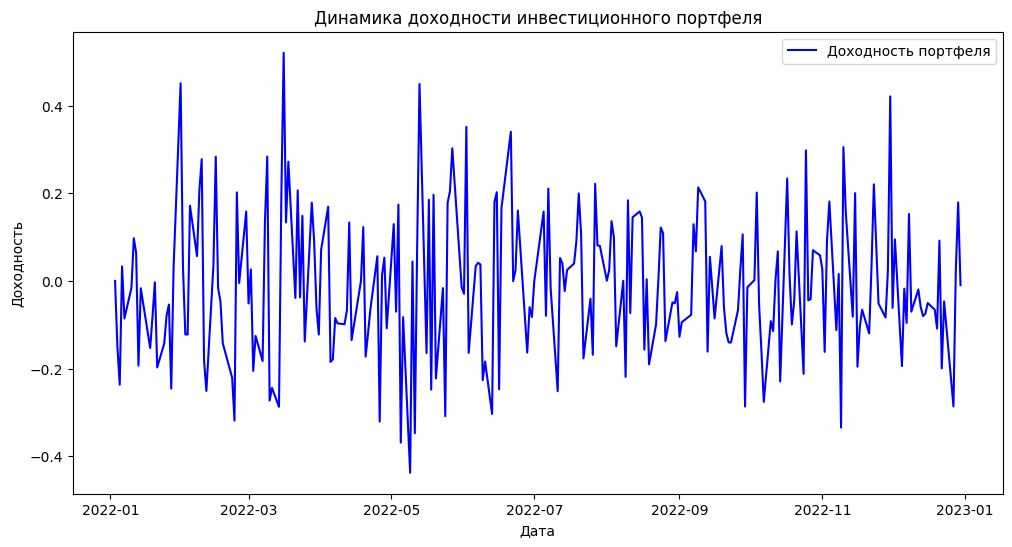

In [ ]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

# Загрузка данных о ценах акций в портфеле
portfolio = ['NVDA', 'TSLA', 'NU', 'NIO']
portfolio_data = yf.download(portfolio, start='2022-01-01', end='2022-12-31')

# Вычисление доходности портфеля
portfolio_data['Portfolio Return'] = (portfolio_data['Adj Close'] / portfolio_data['Adj Close'].shift(1) - 1).sum(axis=1)

# Визуализация динамики доходности портфеля
plt.figure(figsize=(12, 6))
plt.plot(portfolio_data.index, portfolio_data['Portfolio Return'], label='Доходность портфеля', color='blue')
plt.title('Динамика доходности инвестиционного портфеля')
plt.xlabel('Дата')
plt.ylabel('Доходность')
plt.legend()
plt.show()

Пример кода на Python 3 для реализации Алгоритма Крускала

In [ ]:
class Graph:
    def __init__(self, vertices):
        self.V = vertices
        self.graph = []

    def add_edge(self, u, v, w):
        self.graph.append([u, v, w])

    def find_parent(self, parent, i):
        if parent[i] == i:
            return i
        return self.find_parent(parent, parent[i])

    def union(self, parent, rank, x, y):
        x_root = self.find_parent(parent, x)
        y_root = self.find_parent(parent, y)

        if rank[x_root] < rank[y_root]:
            parent[x_root] = y_root
        elif rank[x_root] > rank[y_root]:
            parent[y_root] = x_root
        else:
            parent[y_root] = x_root
            rank[x_root] += 1

    def kruskal(self):
        result = []  # Сюда будем добавлять рёбра минимального остовного дерева
        i, e = 0, 0  # Счетчики для сортировки рёбер

        self.graph = sorted(self.graph, key=lambda item: item[2])  # Сортируем рёбра по весу

        parent = []
        rank = []

        for node in range(self.V):
            parent.append(node)
            rank.append(0)

        while e < self.V - 1:
            u, v, w = self.graph[i]
            i = i + 1
            x = self.find_parent(parent, u)
            y = self.find_parent(parent, v)

            if x != y:
                e = e + 1
                result.append([u, v, w])
                self.union(parent, rank, x, y)

        print("Рёбра минимального остовного дерева:")
        for u, v, w in result:
            print(f"{u} - {v} с весом {w}")


# Пример использования
g = Graph(4)
g.add_edge(0, 1, 10)
g.add_edge(0, 2, 6)
g.add_edge(0, 3, 5)
g.add_edge(1, 3, 15)
g.add_edge(2, 3, 4)

g.kruskal()

Рёбра минимального остовного дерева:
2 - 3 с весом 4
0 - 3 с весом 5
0 - 1 с весом 10


Пример кода на Python 3 для реализации Алгоритма Крускала с данными сайта Yahoo Finance (с визуализацией выходных данных)

In [ ]:
pip install yfinance networkx matplotlib

[*********************100%%**********************]  4 of 4 completed


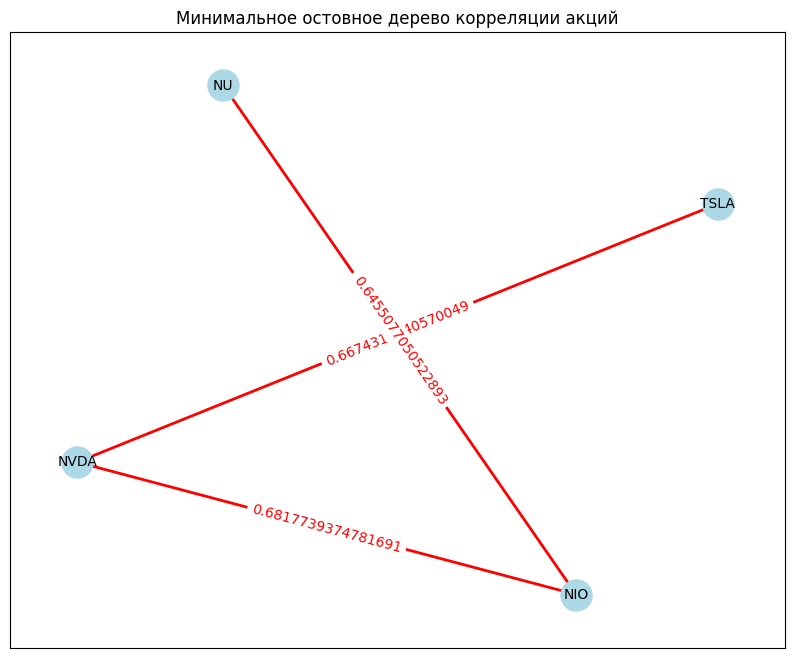

In [ ]:
import yfinance as yf
import networkx as nx
import matplotlib.pyplot as plt

# Загрузка данных о корреляции между акциями
stocks = ['NVDA', 'TSLA', 'NU', 'NIO']
stock_data = yf.download(stocks, start='2022-01-01', end='2022-12-31')

# Вычисление матрицы корреляции
correlation_matrix = stock_data['Adj Close'].corr()

# Создание графа из матрицы корреляции
G = nx.Graph()
for i in range(len(stocks)):
    for j in range(i + 1, len(stocks)):
        stock1, stock2 = stocks[i], stocks[j]
        correlation = correlation_matrix.at[stock1, stock2]
        G.add_edge(stock1, stock2, weight=correlation)

# Реализация алгоритма Крускала
minimum_spanning_tree = nx.minimum_spanning_tree(G)

# Визуализация минимального остовного дерева
pos = nx.spring_layout(G)  # Задаем расположение вершин
labels = {stock: stock for stock in stocks}
edge_labels = {(stock1, stock2): weight for stock1, stock2, weight in minimum_spanning_tree.edges(data='weight')}

plt.figure(figsize=(10, 8))
nx.draw_networkx_nodes(G, pos, node_size=500, node_color='lightblue')
nx.draw_networkx_labels(G, pos, labels=labels, font_size=10)
nx.draw_networkx_edges(G, pos, edgelist=minimum_spanning_tree.edges(), edge_color='r', width=2)
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=10, font_color='red')

plt.title("Минимальное остовное дерево корреляции акций")
plt.show()